# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'> 서울시 통계데이터 활용 </font>

### <font color='blue'>서울시 공공데이터 1</font>
>  
- [SHEET]서울시 자치구 년도별 CCTV 설치 현황
- Datasets 다운 : https://opengov.seoul.go.kr/data/2813905
- 파일이름 : data/public_2017_seoul_cctv_st.csv

In [1]:
# from images import bigpycraft_bda as bpc
from IPython.display import Image 

import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [2]:
df_cctv = pd.read_csv('./data/seoul_cctv_status_by_year.csv',  encoding='utf-8')
df_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
df_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
df_cctv.columns[0]

'기관명'

In [5]:
df_cctv.rename(columns={df_cctv.columns[0] : '구'}, inplace=True)
df_cctv.rename(columns={df_cctv.columns[1] : 'CCTV수'}, inplace=True)
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### <font color='blue'>서울시 공공데이터 2</font>
>  
- 서울시 주민등록인구 (구별) 통계 데이터
- Datasets : http://stat.seoul.go.kr/jsp3/index.jsp
- 통계기간 : 2019년 2/4분기
- 파일이름 : data/Report_seoul_population_2019_2Q.xls

In [6]:
population_img = 'images/Report_seoul_population_2019_2Q.png'
population_xls = './data/Report_seoul_population_2019_2Q.xls'

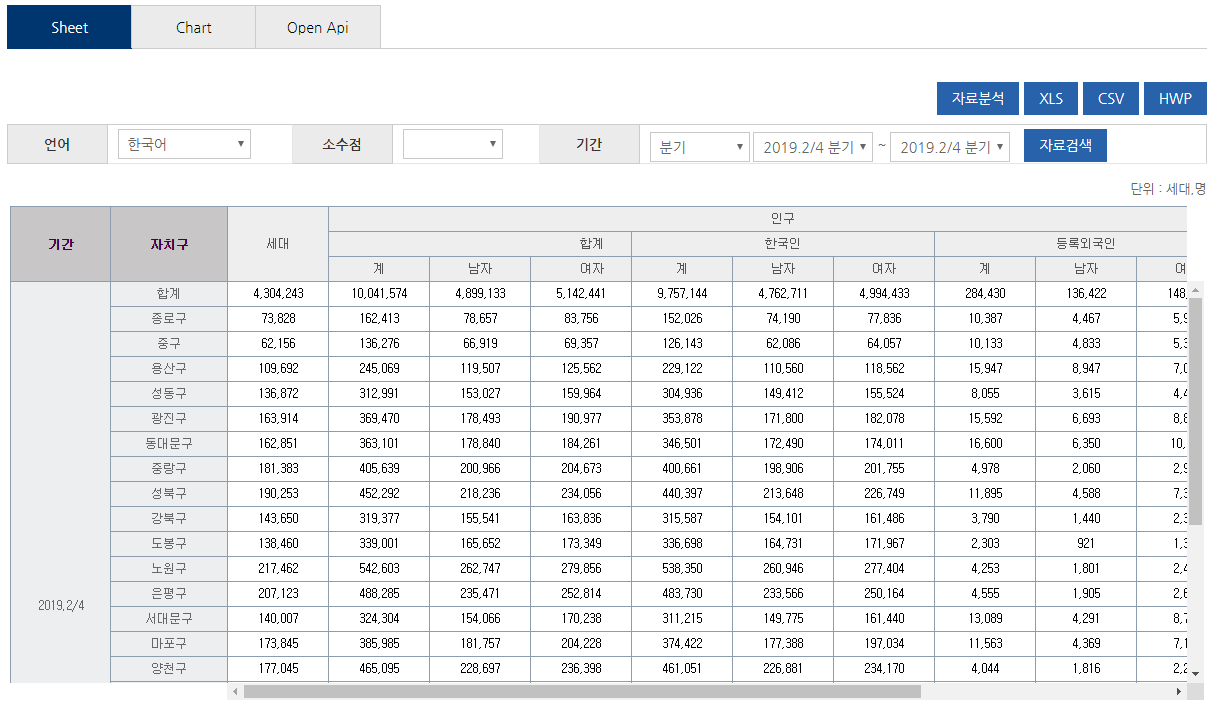

In [7]:
Image(population_img)

In [8]:
df_pop_seoul = pd.read_excel(population_xls,  encoding='utf-8')
df_pop_seoul.head(10)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.2/4,합계,4304243,10041574,4899133,5142441,9757144,4762711,4994433,284430,136422,148008,2.27,1451564
3,2019.2/4,종로구,73828,162413,78657,83756,152026,74190,77836,10387,4467,5920,2.06,27155
4,2019.2/4,중구,62156,136276,66919,69357,126143,62086,64057,10133,4833,5300,2.03,22749
5,2019.2/4,용산구,109692,245069,119507,125562,229122,110560,118562,15947,8947,7000,2.09,38259
6,2019.2/4,성동구,136872,312991,153027,159964,304936,149412,155524,8055,3615,4440,2.23,43370
7,2019.2/4,광진구,163914,369470,178493,190977,353878,171800,182078,15592,6693,8899,2.16,46773
8,2019.2/4,동대문구,162851,363101,178840,184261,346501,172490,174011,16600,6350,10250,2.13,58078
9,2019.2/4,중랑구,181383,405639,200966,204673,400661,198906,201755,4978,2060,2918,2.21,63670


In [9]:
population = pd.read_excel(population_xls,
                           header = 2,
                           usecols = "B, C, D, G, J, N",
                           encoding = "utf-8" 
                          )
population.head()

,자치구,세대,계,계.1,계.2,65세이상고령자
0,합계,4304243,10041574,9757144,284430,1451564
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370


In [10]:
population.rename(columns={population.columns[0] : '구', 
                           population.columns[1] : '세대수', 
                           population.columns[2] : '인구수', 
                           population.columns[3] : '한국인', 
                           population.columns[4] : '외국인', 
                           population.columns[5] : '고령자'}, inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
0,합계,4304243,10041574,9757144,284430,1451564
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370


### <font color='blue'>1단계. CCTV 데이터 파악</font>

In [11]:
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [12]:
df_cctv.sort_values(by='CCTV수', ascending=True).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [13]:
df_cctv.sort_values(by='CCTV수', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


In [14]:
df_cctv['최근증가율'] = (df_cctv['2016년'] + df_cctv['2015년'] + df_cctv['2014년']) / df_cctv['2013년도 이전']  * 100
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [15]:
df_cctv.sort_values(by='최근증가율', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


### <font color='blue'>2단계. 서울시 인구 데이터 파악</font>

In [16]:
population.head()

,구,세대수,인구수,한국인,외국인,고령자
0,합계,4304243,10041574,9757144,284430,1451564
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370


In [17]:
population.drop([0], inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370
5,광진구,163914,369470,353878,15592,46773


In [18]:
population['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [19]:
# population[population['구'].isnull()]
# population.drop([26], inplace=True)
# population.head()

In [20]:
population['외국인비율'] = population['외국인'] / population['인구수'] * 100
population['고령자비율'] = population['고령자'] / population['인구수'] * 100
population.head()

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,73828,162413,152026,10387,27155,6.395424,16.719721
2,중구,62156,136276,126143,10133,22749,7.435645,16.693328
3,용산구,109692,245069,229122,15947,38259,6.507147,15.611522
4,성동구,136872,312991,304936,8055,43370,2.573556,13.856628
5,광진구,163914,369470,353878,15592,46773,4.220099,12.659485


In [21]:
population.sort_values(by='인구수', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,278223,686181,679247,6934,84740,1.010521,12.349511
16,강서구,261383,602230,595602,6628,81965,1.100576,13.610249
23,강남구,230752,547602,542498,5104,69011,0.932064,12.602401
11,노원구,217462,542603,538350,4253,79046,0.783814,14.567925
21,관악구,266692,519864,502089,17775,73693,3.419163,14.175438
12,은평구,207123,488285,483730,4555,79282,0.932857,16.236829
15,양천구,177045,465095,461051,4044,59731,0.869500,12.842753
8,성북구,190253,452292,440397,11895,69341,2.629938,15.331025
17,구로구,174505,439328,405415,33913,64028,7.719289,14.574077
22,서초구,172907,435631,431360,4271,55853,0.980417,12.821172


In [22]:
population.sort_values(by='외국인', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,173701,404229,369017,35212,56891,8.710904,14.073953
17,구로구,174505,439328,405415,33913,64028,7.719289,14.574077
18,금천구,109708,254061,234079,19982,36727,7.865040,14.455977
21,관악구,266692,519864,502089,17775,73693,3.419163,14.175438
6,동대문구,162851,363101,346501,16600,58078,4.571731,15.994999
3,용산구,109692,245069,229122,15947,38259,6.507147,15.611522
5,광진구,163914,369470,353878,15592,46773,4.220099,12.659485
20,동작구,180463,412000,398885,13115,61009,3.183252,14.808010
13,서대문구,140007,324304,311215,13089,51367,4.036028,15.839151
8,성북구,190253,452292,440397,11895,69341,2.629938,15.331025


In [23]:
population.sort_values(by='외국인비율', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,173701,404229,369017,35212,56891,8.710904,14.073953
18,금천구,109708,254061,234079,19982,36727,7.865040,14.455977
17,구로구,174505,439328,405415,33913,64028,7.719289,14.574077
2,중구,62156,136276,126143,10133,22749,7.435645,16.693328
3,용산구,109692,245069,229122,15947,38259,6.507147,15.611522
1,종로구,73828,162413,152026,10387,27155,6.395424,16.719721
6,동대문구,162851,363101,346501,16600,58078,4.571731,15.994999
5,광진구,163914,369470,353878,15592,46773,4.220099,12.659485
13,서대문구,140007,324304,311215,13089,51367,4.036028,15.839151
21,관악구,266692,519864,502089,17775,73693,3.419163,14.175438


In [24]:
population.sort_values(by='고령자', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,278223,686181,679247,6934,84740,1.010521,12.349511
16,강서구,261383,602230,595602,6628,81965,1.100576,13.610249
12,은평구,207123,488285,483730,4555,79282,0.932857,16.236829
11,노원구,217462,542603,538350,4253,79046,0.783814,14.567925
21,관악구,266692,519864,502089,17775,73693,3.419163,14.175438
8,성북구,190253,452292,440397,11895,69341,2.629938,15.331025
23,강남구,230752,547602,542498,5104,69011,0.932064,12.602401
17,구로구,174505,439328,405415,33913,64028,7.719289,14.574077
7,중랑구,181383,405639,400661,4978,63670,1.227200,15.696223
20,동작구,180463,412000,398885,13115,61009,3.183252,14.808010


In [25]:
population.sort_values(by='고령자비율', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,143650,319377,315587,3790,59189,1.186685,18.532643
10,도봉구,138460,339001,336698,2303,57367,0.679349,16.922369
1,종로구,73828,162413,152026,10387,27155,6.395424,16.719721
2,중구,62156,136276,126143,10133,22749,7.435645,16.693328
12,은평구,207123,488285,483730,4555,79282,0.932857,16.236829
6,동대문구,162851,363101,346501,16600,58078,4.571731,15.994999
13,서대문구,140007,324304,311215,13089,51367,4.036028,15.839151
7,중랑구,181383,405639,400661,4978,63670,1.227200,15.696223
3,용산구,109692,245069,229122,15947,38259,6.507147,15.611522
8,성북구,190253,452292,440397,11895,69341,2.629938,15.331025


### <font color='blue'>Tip. DataFrame 병합</font>

In [26]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [27]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [28]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [29]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [30]:
result = pd.concat([df1, df2, df3])    # default axis=0
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [31]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [32]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [33]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [34]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [35]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [36]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [37]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [38]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [39]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [40]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [41]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [42]:
result = pd.concat([df1, df4], ignore_index=True)
result

C:\Python\Anaconda3-1812\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [43]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [44]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [45]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [46]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [47]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [48]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [49]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [50]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### <font color='blue'>3단계. CCTV 데이터와 인구 데이터 합치고 분석</font>

In [51]:
data_result = pd.merge(df_cctv, population, on='구')
data_result.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
1,강동구,1010,379,99,155,377,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
2,강북구,831,369,120,138,204,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
3,강서구,911,388,258,184,81,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
4,관악구,2109,846,260,390,613,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


In [52]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
1,강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
2,강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
3,강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
4,관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


In [53]:
data_result.set_index('구', inplace=True)
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


### <font color='orange'>상관 분석(correlation analysis)</font>
>  
- **상관 분석(correlation analysis)**은 확률론과 통계학에서 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- 두변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 
- 이때 두 변수간의 관계의 강도를 **상관관계(Correlation, Correlation coefficient)**라 한다. 
- 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수 ρ를 사용한다.
- 상관관계의 정도를 파악하는 **상관계수(Correlation coefficient)**는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아님
- 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

<hr>

``` python
Signature: 
    np.corrcoef(x, y=None, rowvar=True, bias=<class 'numpy._globals._NoValue'>, ddof=<class 'numpy._globals._NoValue'>)

Docstring:
    Return Pearson product-moment correlation coefficients.

    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is

    .. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }

    The values of `R` are between -1 and 1, inclusive.
```

In [54]:
np.corrcoef(data_result['고령자비율'],data_result['CCTV수'])

array([[ 1.        , -0.28763796],
       [-0.28763796,  1.        ]])

In [55]:
np.corrcoef(data_result['외국인비율'],data_result['CCTV수'])

array([[ 1.        , -0.05302857],
       [-0.05302857,  1.        ]])

In [56]:
np.corrcoef(data_result['인구수'],data_result['CCTV수'])

array([[1.        , 0.21926604],
       [0.21926604, 1.        ]])

In [57]:
data_result.sort_values(by='CCTV수', ascending=False).head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
양천구,2482,34.671731,177045,465095,461051,4044,59731,0.869500,12.842753
서초구,2297,63.371266,172907,435631,431360,4271,55853,0.980417,12.821172
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438
은평구,2108,85.237258,207123,488285,483730,4555,79282,0.932857,16.236829
용산구,2096,53.216374,109692,245069,229122,15947,38259,6.507147,15.611522
구로구,1884,64.973730,174505,439328,405415,33913,64028,7.719289,14.574077
동대문구,1870,74.766355,162851,363101,346501,16600,58078,4.571731,15.994999
성북구,1651,63.627354,190253,452292,440397,11895,69341,2.629938,15.331025


In [58]:
data_result.sort_values(by='인구수', ascending=False).head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
송파구,1081,104.347826,278223,686181,679247,6934,84740,1.010521,12.349511
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
노원구,1566,188.929889,217462,542603,538350,4253,79046,0.783814,14.567925
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438
은평구,2108,85.237258,207123,488285,483730,4555,79282,0.932857,16.236829
양천구,2482,34.671731,177045,465095,461051,4044,59731,0.869500,12.842753
성북구,1651,63.627354,190253,452292,440397,11895,69341,2.629938,15.331025
구로구,1884,64.973730,174505,439328,405415,33913,64028,7.719289,14.574077


### <font color='blue'>4단계. CCTV와 인구현황 그래프로 분석</font>

In [59]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [60]:
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


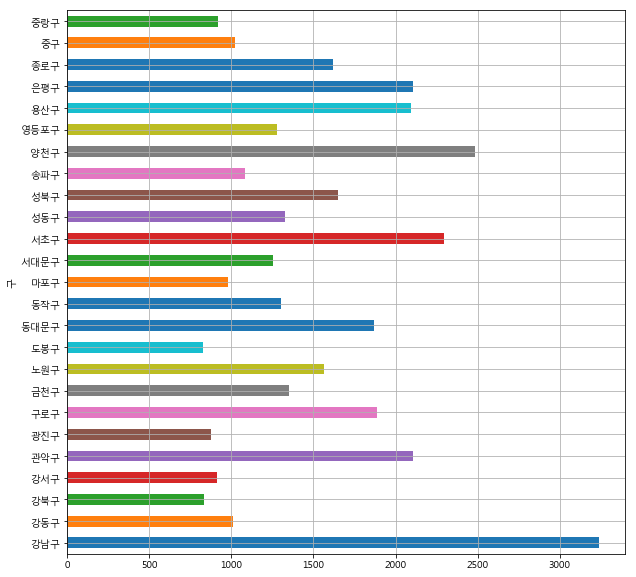

In [61]:
plt.figure()
data_result['CCTV수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

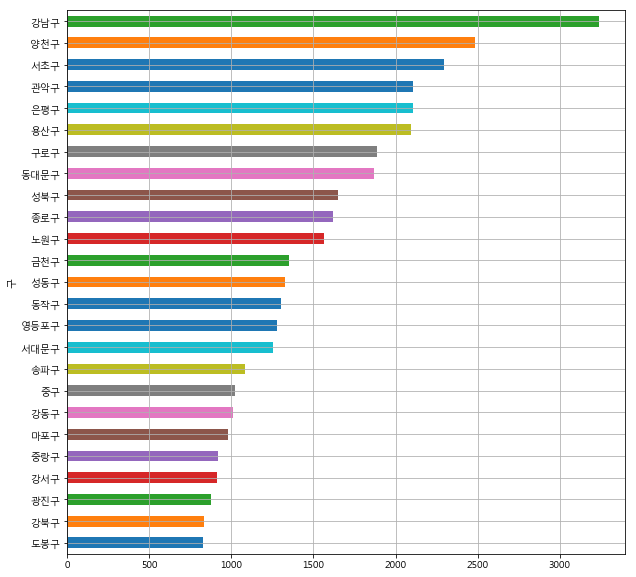

In [62]:
data_result['CCTV수'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [63]:
data_result['CCTV비율'] = data_result['CCTV수'] / data_result['인구수'] * 100
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구,,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401,0.591305
강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107,0.235680
강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643,0.260194
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249,0.151271
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438,0.405683


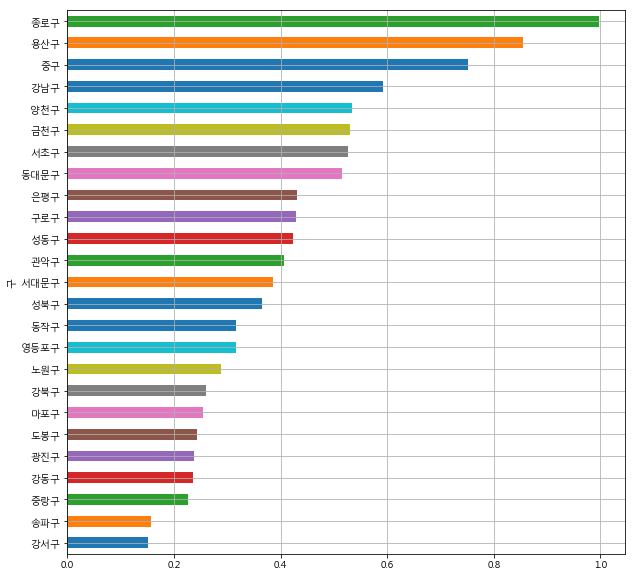

In [64]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

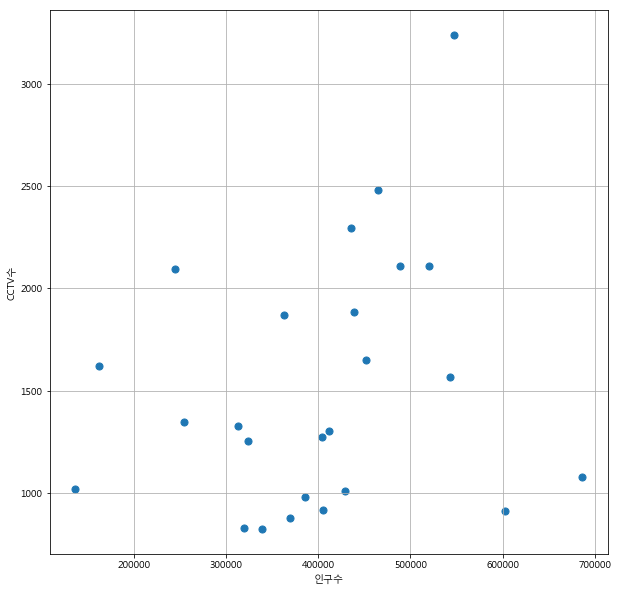

In [65]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

<hr>

``` python
Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error.

Returns
-------
p : ndarray, shape (deg + 1,) or (deg + 1, K)
    Polynomial coefficients, highest power first.  If `y` was 2-D, the
    coefficients for `k`-th data set are in ``p[:,k]``.
    
```

In [66]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)
fp1

array([1.05399766e-03, 1.09196818e+03])

<hr>

``` python
Init signature: np.poly1d(c_or_r, r=False, variable=None)
Docstring:     
A one-dimensional polynomial class.

A convenience class, used to encapsulate "natural" operations on
polynomials so that said operations may take on their customary
form in code (see Examples).

```

In [67]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

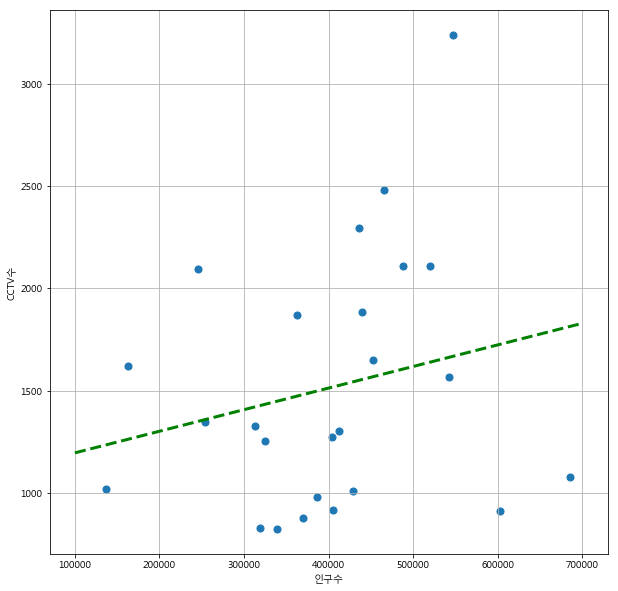

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

### <font color='blue'>5단계. 그래프에 의미 부여 </font>

In [69]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['CCTV수'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구,,,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401,0.591305,1568.860593
양천구,2482,34.671731,177045,465095,461051,4044,59731,0.869500,12.842753,0.533654,899.822778
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249,0.151271,815.717191
서초구,2297,63.371266,172907,435631,431360,4271,55853,0.980417,12.821172,0.527281,745.877765
용산구,2096,53.216374,109692,245069,229122,15947,38259,6.507147,15.611522,0.855269,745.729667


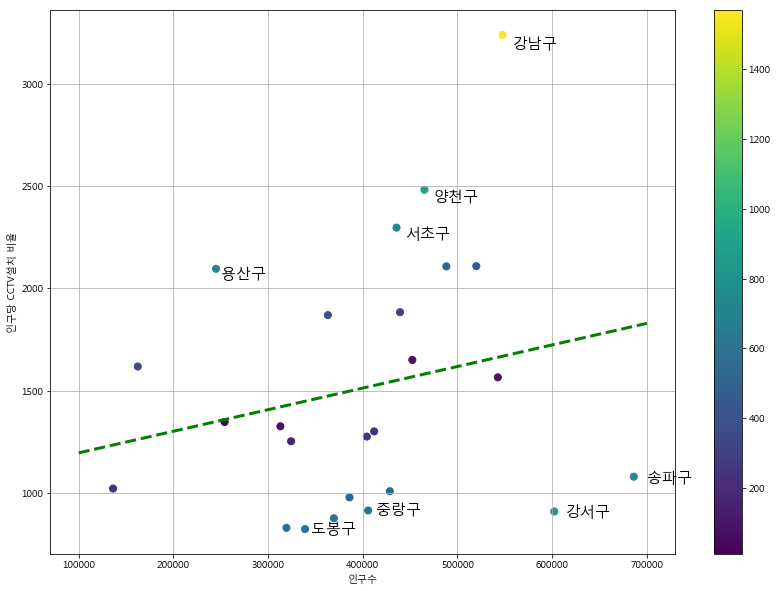

In [70]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(8):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV수'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당 CCTV설치 비율')
plt.colorbar()
plt.grid()
plt.show()

### <font color='blue'> 서울시 구별 인구수와 CCTV설치 비율에 대한 분석 결과</font>
* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 용산구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 중랑구는 다른 구에 비해 CCTV 비율이 낮다

In [71]:
df_sort.to_csv('data/seoul_population_cctv.csv', sep=',', index=True, encoding='euc-kr')

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>